In [2]:
#This cell imports the required modules to the notebook
#RUN THIS CELL BEFORE ANY OTHER CODE IS RUN
import matplotlib.pyplot as plt     #imports graph plotting library
import astropy.io.fits as ast       #imports FITS manipulation library
import numpy as np                  #imports numerical manipulation library
import random                       #imports module to generate random numbers for monte carlo error propagation

#magic function that forces plots to appear in this notebook
%matplotlib inline                  
plt.ion()                           #function that loads plotting library in "interactive mode"

from astropy.utils.data import get_pkg_data_filename   #imports function to get filename of data file
from scipy.stats import sem

print("Required Libraries Loaded Successfully")

def graderr(R, err, n): #user defined function does monte carlo error propagation
    """
    function for calculating the error in the gradient, using a monte carlo error propagation philosophy
    """
    grads = [[] for count in range(n)]                 #initialises list of lists, with indices [iteration][latitude]
    for i in range(n):                                 #loops through randomisation process n times
        randR = np.zeros(len(R))                       #initialises list of random R values
        for j in range(len(R)):                        #loops through the random function to form the list
            randR[j] = random.uniform(R[j]-err[j], R[j]+err[j]) #generates random number within bounds of error bars
        grads[i] = np.gradient(randR)                  #finds the gradient of the random R list generated above
        
    graderr = np.zeros(len(R))                         #initialises the list of gradient errors
    for i in range(len(R)):                            #loops through list of error calculation from the lists of random R
        gradforpoint = np.zeros(n)                     #initialises restructured list of iterations of grad, index [latitude]
        for j in range(n):                             #loops through the iterations
            gradforpoint[j] = grads[j][i]              #gets the gradR error through each iteration and makes a new list from it
        graderr[i] = (max(gradforpoint)-min(gradforpoint))/2 #calculates error by finding the mean of the max and min errors
    return(graderr)                                    #returns list of errors
        
print("User-Defined Functions Loaded Successfully")

Required Libraries Loaded Successfully
User-Defined Functions Loaded Successfully


In [3]:
from matplotlib import cm #import colormap manipulation sections
from matplotlib.colors import ListedColormap, LinearSegmentedColormap #import functions to define a colormap

bone = cm.get_cmap('bone')

myboned = {'red': [[0.0, 0.0, 0.0],
                  #[0.0, 0.0, 0.0], #start
                  [0.75, 0.65, 0.65], #anchor 0.75
                  #[1.0, 1.0, 1.0], #end
                  [1.0, 1.0, 1.0]], 
         'green': [[0.0, 0.0, 0.0],
                   #[0.0, 0.0, 0.0], #start
                   [0.36, 0.31, 0.31], #anchor 0.36
                   [0.75, 0.78, 0.78], #anchor 0.75
                   #[1.0, 1.0, 1.0], #end
                   [1.0, 1.0, 1.0]],
         'blue': [[0.0, 0.0, 0.0],
                  #[0.0, 0.0, 0.0], #start
                  [0.36, 0.45, 0.45], #anchor 0.36
                  #[1.0, 1.0, 1.0], #end
                  [1.0, 1.0, 1.0]]}
mybone = LinearSegmentedColormap('mybone', segmentdata = myboned, N=256)

cmF467Md = {'red': [[0.0, 0.0, 0.0],
                    [0.55, 0.0, 0.0], #start
                    [0.7, 0.65, 0.65], #anchor 0.75
                    [0.75, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.55, 0.0, 0.0], #start
                     [0.622, 0.31, 0.31], #anchor 0.36
                     [0.7, 0.78, 0.78], #anchor 0.75
                     [0.75, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.55, 0.0, 0.0], #start
                    [0.622, 0.45, 0.45], #anchor 0.36
                    [0.75, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF467M = LinearSegmentedColormap('cm467', segmentdata = cmF467Md, N=256)

cmF547Md = {'red': [[0.0, 0.0, 0.0],
                    [0.7, 0.0, 0.0], #start
                    [0.85, 0.65, 0.65], #anchor 0.75
                    [0.9, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.7, 0.0, 0.0], #start
                     [0.772, 0.31, 0.31], #anchor 0.36
                     [0.85, 0.78, 0.78], #anchor 0.75
                     [0.9, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.7, 0.0, 0.0], #start
                    [0.772, 0.45, 0.45], #anchor 0.36
                    [0.9, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF547M = LinearSegmentedColormap('cm547', segmentdata = cmF547Md, N=256)

cmFQ619Nd = {'red': [[0.0, 0.0, 0.0],
                     [0.25, 0.0, 0.0], #start
                     [0.475, 0.65, 0.65], #anchor 0.75
                     [0.55, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]], 
            'green': [[0.0, 0.0, 0.0],
                      [0.25, 0.0, 0.0], #start
                      [0.358, 0.31, 0.31], #anchor 0.36
                      [0.475, 0.78, 0.78], #anchor 0.75
                      [0.55, 1.0, 1.0], #end
                      [1.0, 1.0, 1.0]],
            'blue': [[0.0, 0.0, 0.0],
                     [0.25, 0.0, 0.0], #start
                     [0.358, 0.45, 0.45], #anchor 0.36
                     [0.55, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]]}
cmFQ619N = LinearSegmentedColormap('cm619', segmentdata = cmFQ619Nd, N=256)

cmF657Nd = {'red': [[0.0, 0.0, 0.0],
                    [0.45, 0.0, 0.0], #start
                    [0.7125, 0.65, 0.65], #anchor 0.75
                    [0.8, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.45, 0.0, 0.0], #start
                     [0.576, 0.31, 0.31], #anchor 0.36
                     [0.7125, 0.78, 0.78], #anchor 0.75
                     [0.8, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.45, 0.0, 0.0], #start
                    [0.576, 0.45, 0.45], #anchor 0.36
                    [0.8, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF657N = LinearSegmentedColormap('cm657', segmentdata = cmF657Nd, N=256)

cmFQ727Nd = {'red': [[0.0, 0.0, 0.0],
                     [0.1, 0.0, 0.0], #start
                     [0.2125, 0.65, 0.65], #anchor 0.75
                     [0.25, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]], 
            'green': [[0.0, 0.0, 0.0],
                      [0.1, 0.0, 0.0], #start
                      [0.154, 0.31, 0.31], #anchor 0.36
                      [0.2125, 0.78, 0.78], #anchor 0.75
                      [0.25, 1.0, 1.0], #end
                      [1.0, 1.0, 1.0]],
            'blue': [[0.0, 0.0, 0.0],
                     [0.1, 0.0, 0.0], #start
                     [0.154, 0.45, 0.45], #anchor 0.36
                     [0.25, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]]}
cmFQ727N = LinearSegmentedColormap('cm727', segmentdata = cmFQ727Nd, N=256)

cmF763Md = {'red': [[0.0, 0.0, 0.0],
                    [0.3, 0.0, 0.0], #start
                    [0.4125, 0.65, 0.65], #anchor 0.75
                    [0.45, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.3, 0.0, 0.0], #start
                     [0.354, 0.31, 0.31], #anchor 0.36
                     [0.4125, 0.78, 0.78], #anchor 0.75
                     [0.45, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.3, 0.0, 0.0], #start
                    [0.345, 0.45, 0.45], #anchor 0.36
                    [0.45, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF763M = LinearSegmentedColormap('cm763', segmentdata = cmF763Md, N=256)

cmF845Md = {'red': [[0.0, 0.0, 0.0],
                    [0.2, 0.0, 0.0], #start
                    [0.275, 0.65, 0.65], #anchor 0.75
                    [0.3, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.2, 0.0, 0.0], #start
                     [0.236, 0.31, 0.31], #anchor 0.36
                     [0.275, 0.78, 0.78], #anchor 0.75
                     [0.3, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.2, 0.0, 0.0], #start
                    [0.236, 0.45, 0.45], #anchor 0.36
                    [0.3, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF845M = LinearSegmentedColormap('cm845', segmentdata = cmF845Md, N=256)

def plot_linearmap(cdict):
    newcmp = cdict
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

#plot_linearmap(bone)
#plot_linearmap(mybone)
#plot_linearmap(cmF467M)
#plot_linearmap(cmF547M)
#plot_linearmap(cmFQ619N)
#plot_linearmap(cmF657N)
#plot_linearmap(cmFQ727N)
#plot_linearmap(cmF763M)
#plot_linearmap(cmF845M)

#cmaps = [cmF467M, cmF547M, cmFQ619N, cmF657N, cmFQ727N, cmF763M, cmF845M]
cmaps = [bone, bone, bone, bone, bone, bone, bone]

# Filter F467M OPAL Years

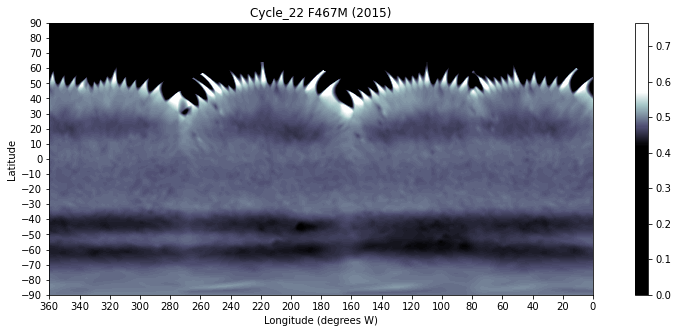

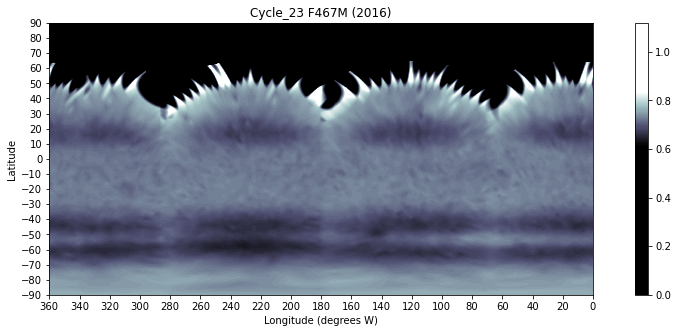

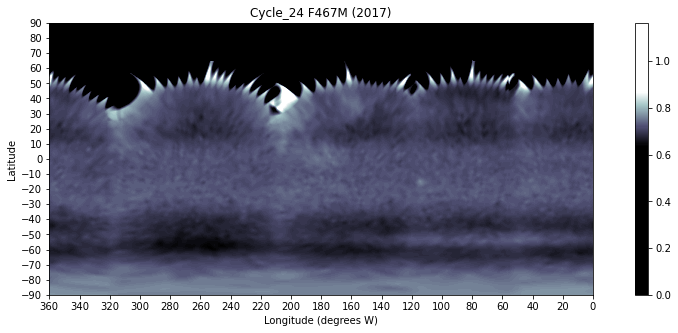

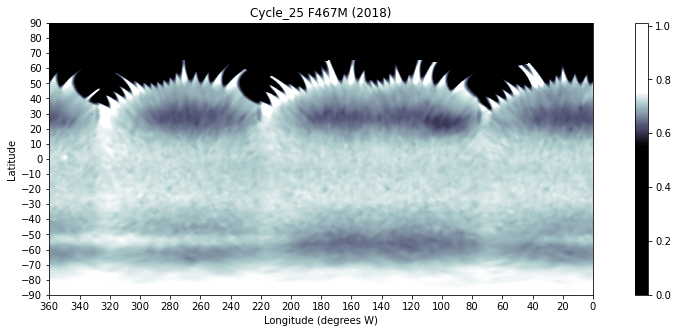

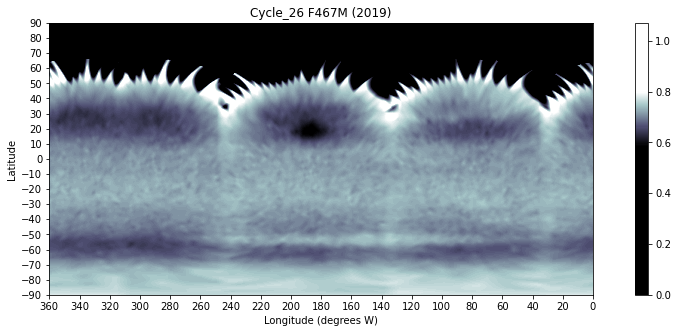

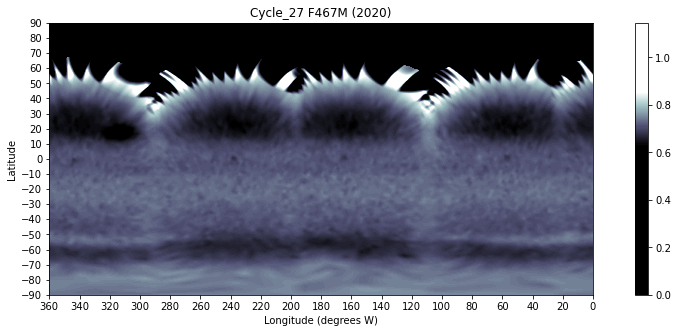

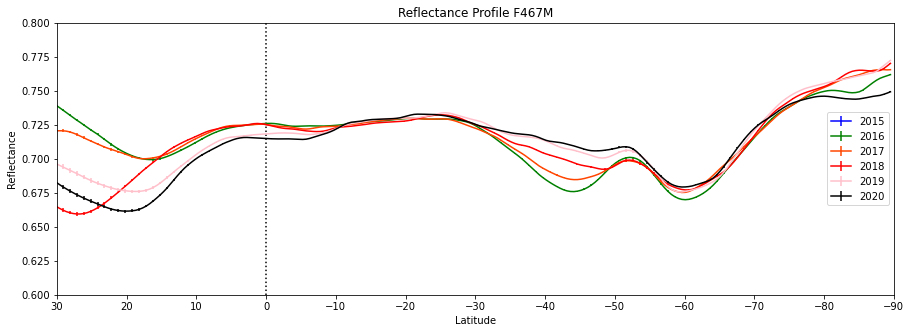

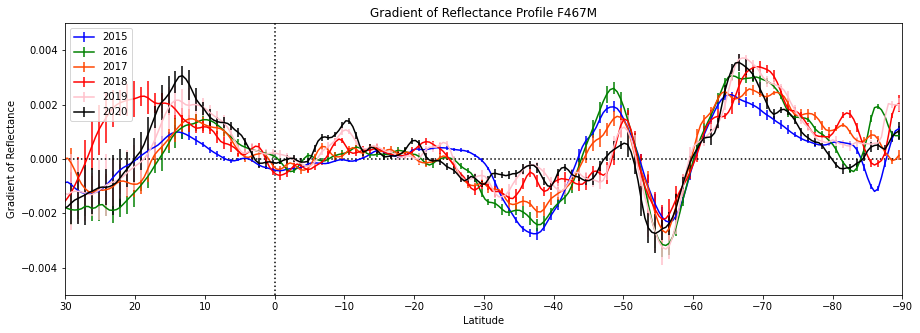

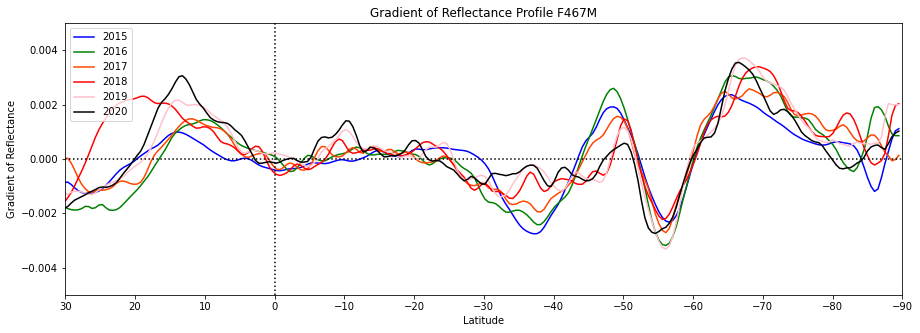

In [4]:
general_filepath = 'OPAL_Neptune/'
cycles = ['Cycle_22','Cycle_23','Cycle_24','Cycle_25','Cycle_26','Cycle_27']
rotations = ['A','A','A','C','A','A']
filtername = 'F467M'
plotcolours = ['blue','green','orangered','red','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00741,0.00475,0.00475,0.00475,0.00475,0.00475] #taken from the OPAL ReadMe
NoOfFilters = len(cycles)
colourmap = cmF467M
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

Years = [0,0,0,0,0,0]
for i in range(len(cycles)):
    Years[i] = int(cycles[i][6:8])+(2015-22)

filepaths = []
#FIGURE OUT HOW TO COMPOSE THE SERIES OF NEW FILEPATHS
for i in range(NoOfFilters):
    cycleno = cycles[i][6:8]
    filepaths.append(general_filepath + cycles[i] + '/' + filtername + '_' + cycleno + '_' + rotations[i] + '.fits')

#initialise the data store variable
plotRData = [0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    print(resolution)
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    plt.figure(figsize=(15,5))
    plt.imshow(data, cmap=colourmap, extent=[360,0,-90,90])
    plt.title(str(cycles[i]+' '+filtername+' ('+str(Years[i])+')'))
    plt.xlabel("Longitude (degrees W)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i] , label = Years[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0.6,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = Years[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA Without ErrorBars
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRData[i], color = plotcolours[i], label = Years[i])
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Filter F547M OPAL Years

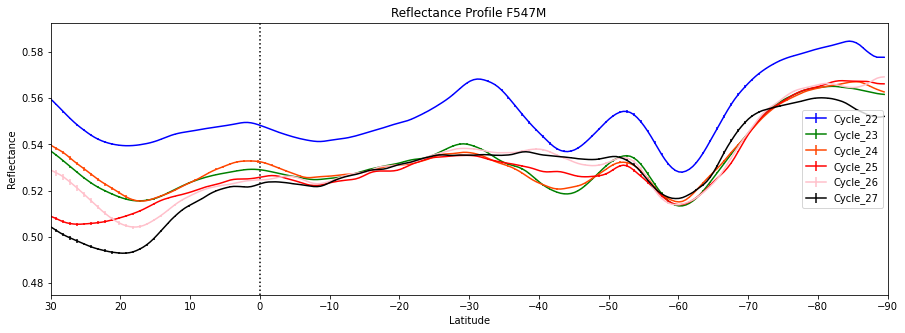

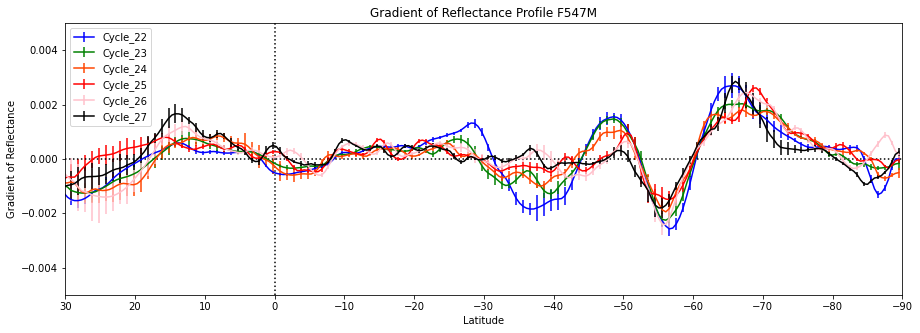

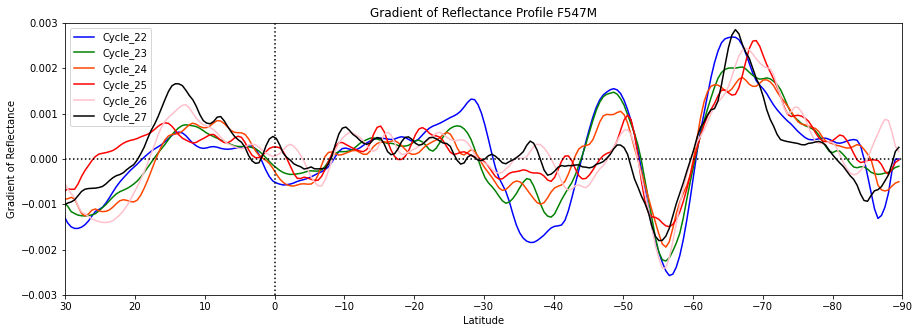

In [8]:
general_filepath = 'OPAL_Neptune/'
cycles = ['Cycle_22','Cycle_23','Cycle_24','Cycle_25','Cycle_26','Cycle_27']
rotations = ['A','A','A','C','A','A']
filtername = 'F547M'
plotcolours = ['blue','green','orangered','red','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00295,0.00249,0.00249,0.00249,0.00249,0.00249] #taken from the OPAL ReadMe
NoOfFilters = len(cycles)
colourmap = cmF547M
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
#FIGURE OUT HOW TO COMPOSE THE SERIES OF NEW FILEPATHS
for i in range(NoOfFilters):
    cycleno = cycles[i][6:8]
    filepaths.append(general_filepath + cycles[i] + '/' + filtername + '_' + cycleno + '_' + rotations[i] + '.fits')

#initialise the data store variable
plotRData = [0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap, extent=[360,0,-90,90])
    #plt.title(str(cycles[i]+' '+filtername))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i] , label = cycles[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0.475,0.5925]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = cycles[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA Without ErrorBars
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRData[i], color = plotcolours[i], label = cycles[i])
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.003,0.003]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Filter FQ619N OPAL Years

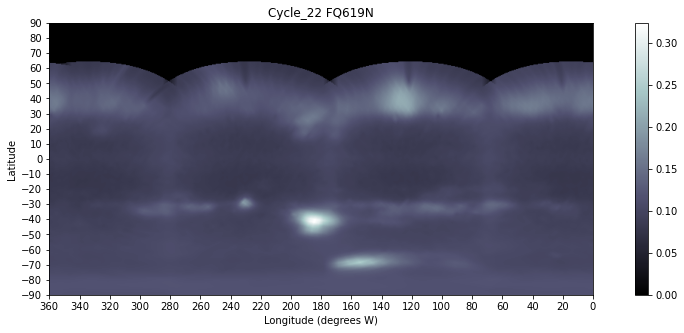

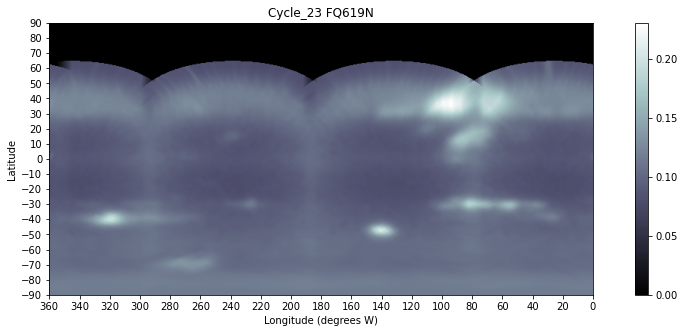

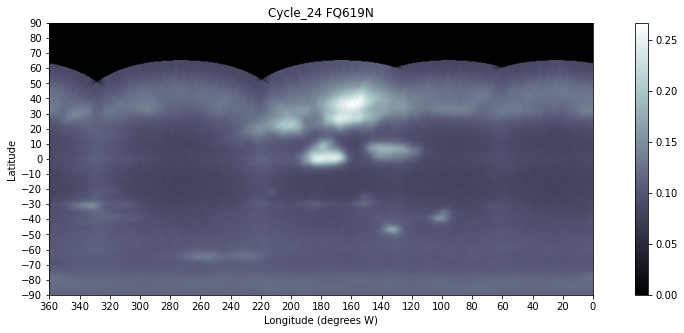

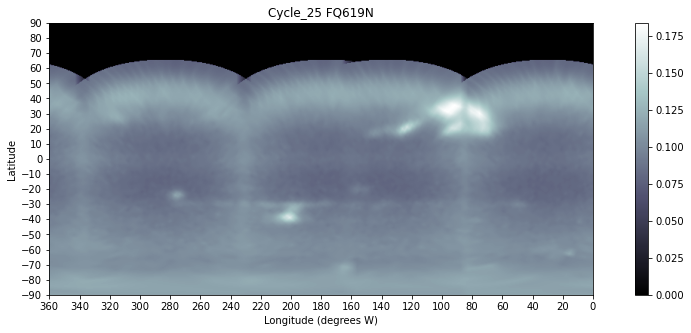

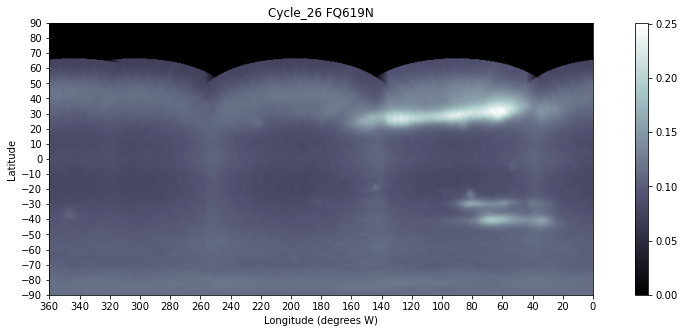

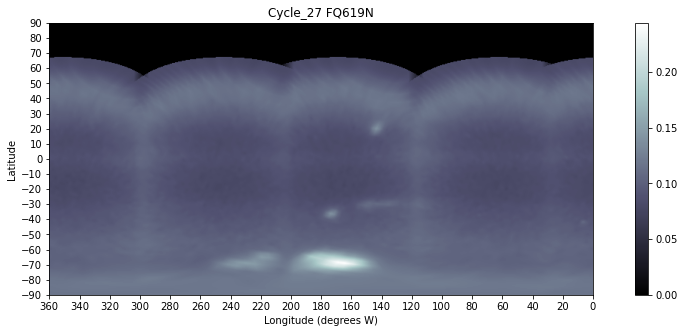

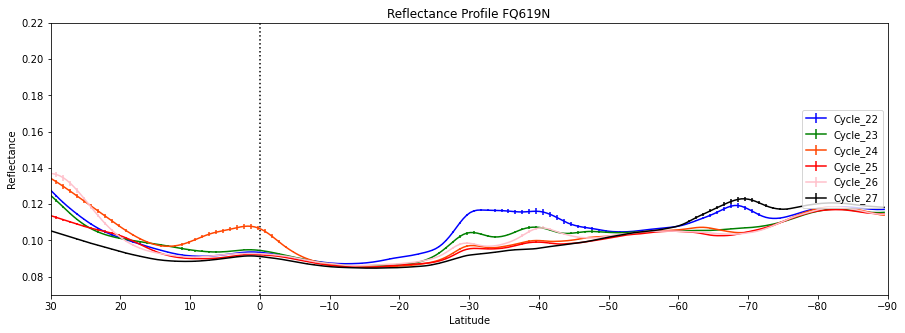

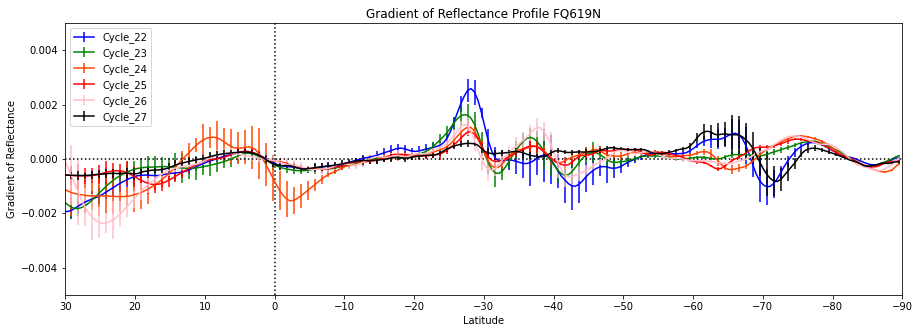

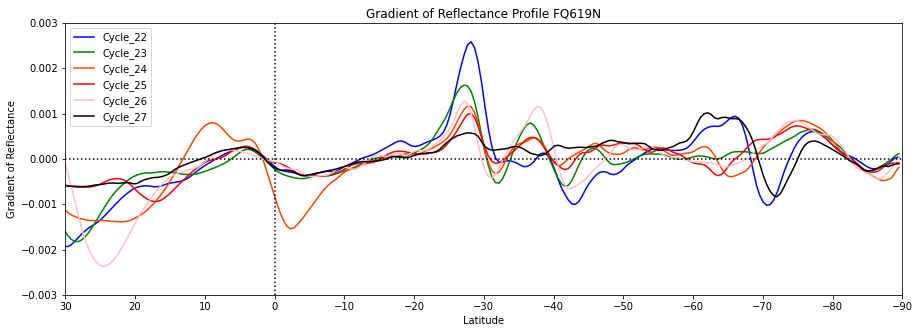

In [9]:
general_filepath = 'OPAL_Neptune/'
cycles = ['Cycle_22','Cycle_23','Cycle_24','Cycle_25','Cycle_26','Cycle_27']
rotations = ['A','A','A','C','A','A']
filtername = 'FQ619N'
plotcolours = ['blue','green','orangered','red','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00160,0.00160,0.00160,0.00160,0.00160,0.00160] #taken from the OPAL ReadMe
NoOfFilters = len(cycles)
colourmap = bone
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
#FIGURE OUT HOW TO COMPOSE THE SERIES OF NEW FILEPATHS
for i in range(NoOfFilters):
    cycleno = cycles[i][6:8]
    filepaths.append(general_filepath + cycles[i] + '/' + filtername + '_' + cycleno + '_' + rotations[i] + '.fits')

#initialise the data store variable
plotRData = [0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    plt.figure(figsize=(15,5))
    plt.imshow(data, cmap=colourmap, extent=[360,0,-90,90])
    plt.title(str(cycles[i]+' '+filtername))
    plt.xlabel("Longitude (degrees W)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i] , label = cycles[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0.07,0.22]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = cycles[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA Without ErrorBars
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRData[i], color = plotcolours[i], label = cycles[i])
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.003,0.003]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Filter F657N OPAL Years

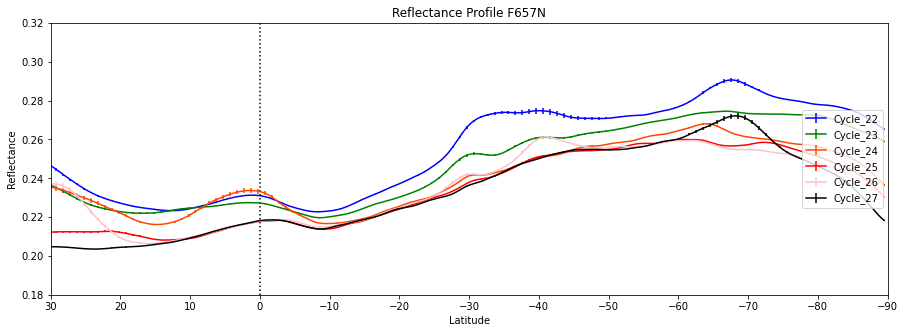

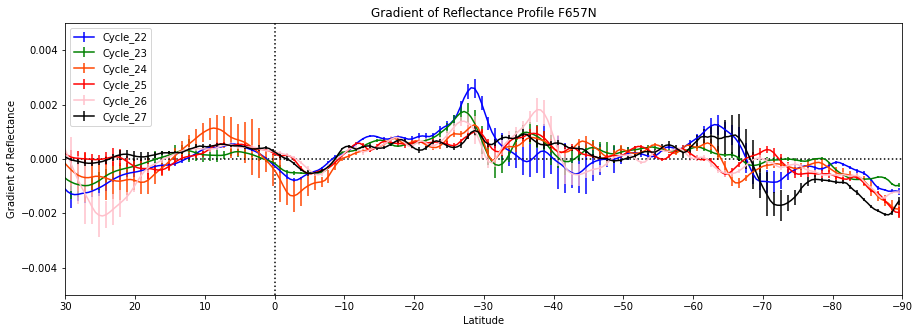

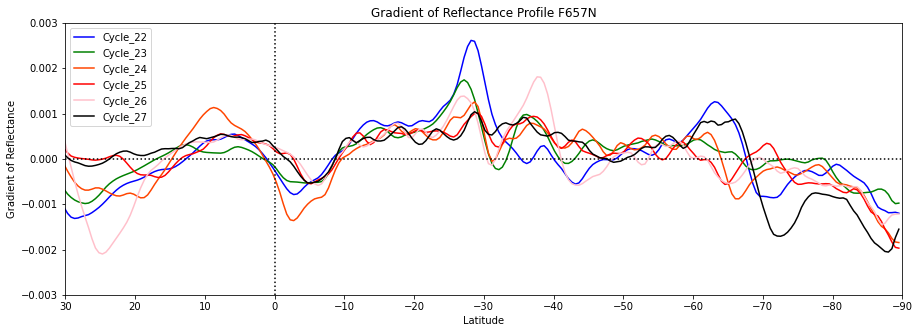

In [10]:
general_filepath = 'OPAL_Neptune/'
cycles = ['Cycle_22','Cycle_23','Cycle_24','Cycle_25','Cycle_26','Cycle_27']
rotations = ['A','A','A','C','A','A']
filtername = 'F657N'
plotcolours = ['blue','green','orangered','red','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00529,0.00406,0.00405,0.00405,0.00405,0.00405] #taken from the OPAL ReadMe
NoOfFilters = len(cycles)
colourmap = cmF657N
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
#FIGURE OUT HOW TO COMPOSE THE SERIES OF NEW FILEPATHS
for i in range(NoOfFilters):
    cycleno = cycles[i][6:8]
    filepaths.append(general_filepath + cycles[i] + '/' + filtername + '_' + cycleno + '_' + rotations[i] + '.fits')

#initialise the data store variable
plotRData = [0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap, extent=[360,0,-90,90])
    #plt.title(str(cycles[i]+' '+filtername))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i] , label = cycles[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0.18,0.32]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = cycles[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRData[i], color = plotcolours[i], label = cycles[i])
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.003,0.003]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Filter FQ727N OPAL Years

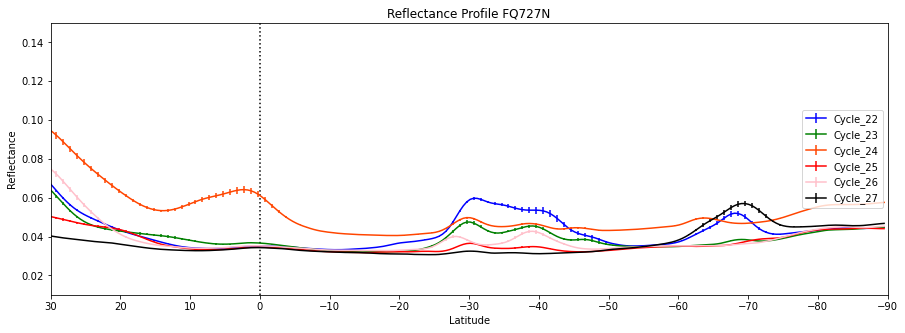

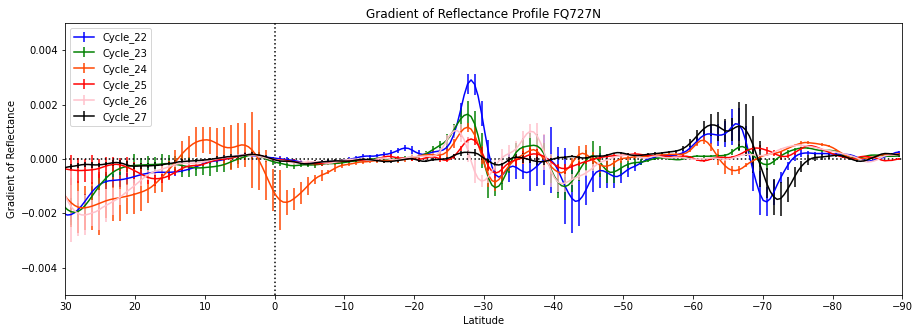

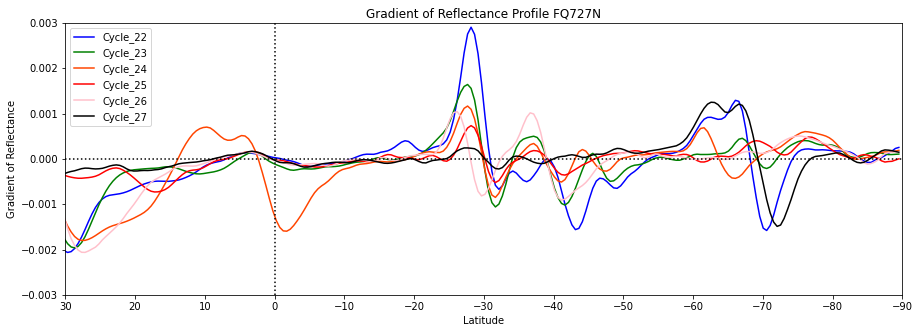

In [11]:
general_filepath = 'OPAL_Neptune/'
cycles = ['Cycle_22','Cycle_23','Cycle_24','Cycle_25','Cycle_26','Cycle_27']
rotations = ['A','A','A','C','A','A']
filtername = 'FQ727N'
plotcolours = ['blue','green','orangered','red','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00203,0.00203,0.00260,0.00203,0.00203,0.00203] #taken from the OPAL ReadMe
NoOfFilters = len(cycles)
colourmap = cmFQ727N
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
#FIGURE OUT HOW TO COMPOSE THE SERIES OF NEW FILEPATHS
for i in range(NoOfFilters):
    cycleno = cycles[i][6:8]
    filepaths.append(general_filepath + cycles[i] + '/' + filtername + '_' + cycleno + '_' + rotations[i] + '.fits')

#initialise the data store variable
plotRData = [0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap, extent=[360,0,-90,90])
    #plt.title(str(cycles[i]+' '+filtername))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i] , label = cycles[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0.01,0.15]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = cycles[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRData[i], color = plotcolours[i], label = cycles[i])
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.003,0.003]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Filter F763M OPAL Years

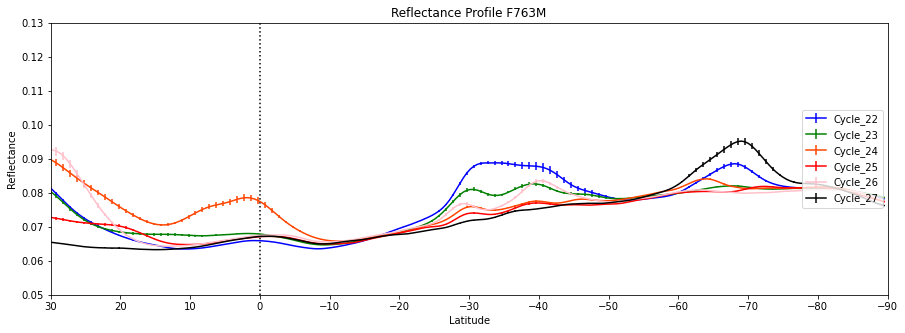

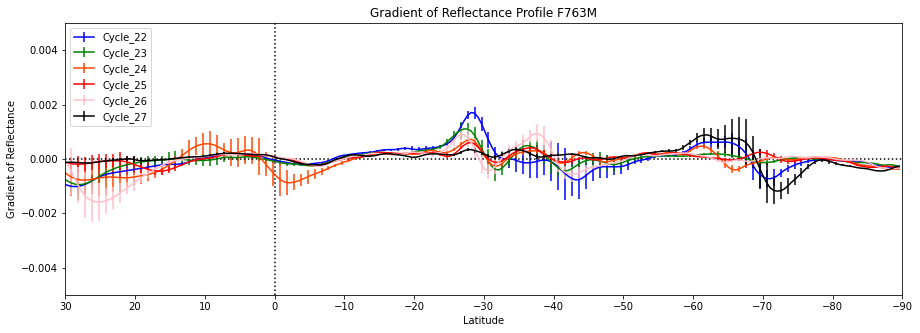

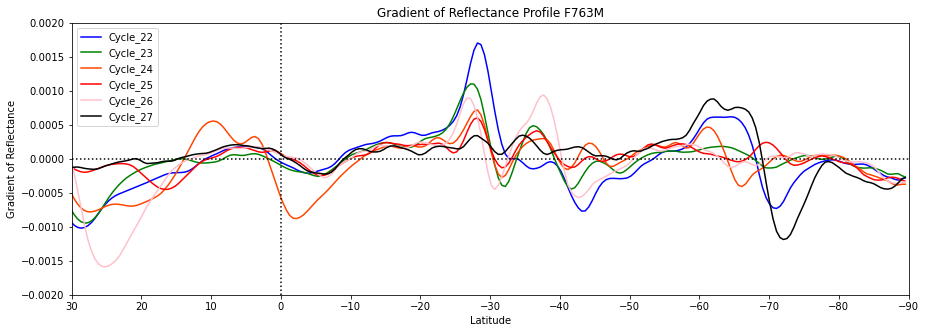

In [12]:
general_filepath = 'OPAL_Neptune/'
cycles = ['Cycle_22','Cycle_23','Cycle_24','Cycle_25','Cycle_26','Cycle_27']
rotations = ['A','A','A','C','A','A']
filtername = 'F763M'
plotcolours = ['blue','green','orangered','red','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00146,0.00145,0.00145,0.00145,0.00145,0.00145] #taken from the OPAL ReadMe
NoOfFilters = len(cycles)
colourmap = cmF763M
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
#FIGURE OUT HOW TO COMPOSE THE SERIES OF NEW FILEPATHS
for i in range(NoOfFilters):
    cycleno = cycles[i][6:8]
    filepaths.append(general_filepath + cycles[i] + '/' + filtername + '_' + cycleno + '_' + rotations[i] + '.fits')

#initialise the data store variable
plotRData = [0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap, extent=[360,0,-90,90])
    #plt.title(str(cycles[i]+' '+filtername))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i] , label = cycles[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0.05,0.13]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = cycles[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRData[i], color = plotcolours[i], label = cycles[i])
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.002,0.002]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

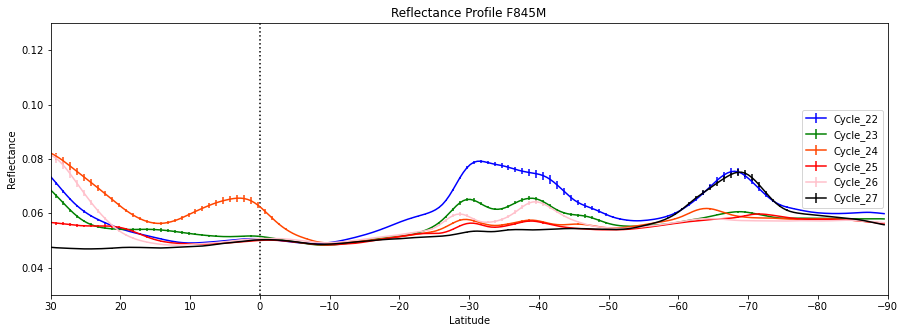

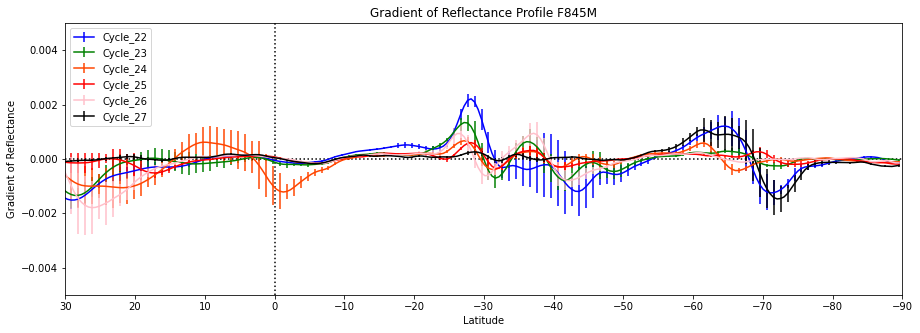

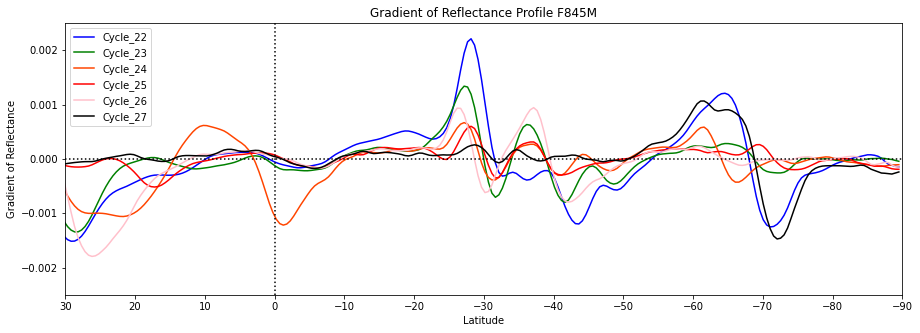

In [13]:
general_filepath = 'OPAL_Neptune/'
cycles = ['Cycle_22','Cycle_23','Cycle_24','Cycle_25','Cycle_26','Cycle_27']
rotations = ['A','A','A','C','A','A']
filtername = 'F845M'
plotcolours = ['blue','green','orangered','red','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00135,0.00130,0.00130,0.00130,0.00130,0.00130] #taken from the OPAL ReadMe
NoOfFilters = len(cycles)
colourmap = cmF845M
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
#FIGURE OUT HOW TO COMPOSE THE SERIES OF NEW FILEPATHS
for i in range(NoOfFilters):
    cycleno = cycles[i][6:8]
    filepaths.append(general_filepath + cycles[i] + '/' + filtername + '_' + cycleno + '_' + rotations[i] + '.fits')

#initialise the data store variable
plotRData = [0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap, extent=[360,0,-90,90])
    #plt.title(str(cycles[i]+' '+filtername))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i] , label = cycles[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0.03,0.13]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = cycles[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRData[i], color = plotcolours[i], label = cycles[i])
plt.title('Gradient of Reflectance Profile ' + filtername)
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.0025,0.0025]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')